In [1]:
import numpy as np
from pydgrid.pydgrid import grid
from pydgrid.pf import pf_eval,time_serie

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.io import push_notebook
output_notebook()

Loading BokehJS ...

## 907 bus 3 wire system with transformer

### Execute power flow 

In [5]:
sys1 = grid()
sys1.read('n1_f1.json')  # Load data
sys1.read_loads_shapes('n1_f1_load_shapes.json')  
sys1.pf_solver = 2
sys1.pf()  # solve power flow
        
sys1.get_v()      # post process voltages
sys1.get_i()      # post process currents

In [6]:
%timeit sys1.pf()  # solve power flow

2.35 ms ± 77.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
t_ini = 0.0
t_end = 24*60*60
Dt = 100
sys1.params_pf[0].pf_solver = sys1.pf_solver
%timeit T,V_nodes,I_nodes,Iters = time_serie(t_ini,t_end,Dt,sys1.params_pf,sys1.params_lshapes)

2.04 s ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
T,V_nodes,I_nodes,Iters = time_serie(t_ini,t_end,Dt,sys1.params_pf,sys1.params_lshapes)

### Get element transfomers results

<IPython.core.display.Javascript object>


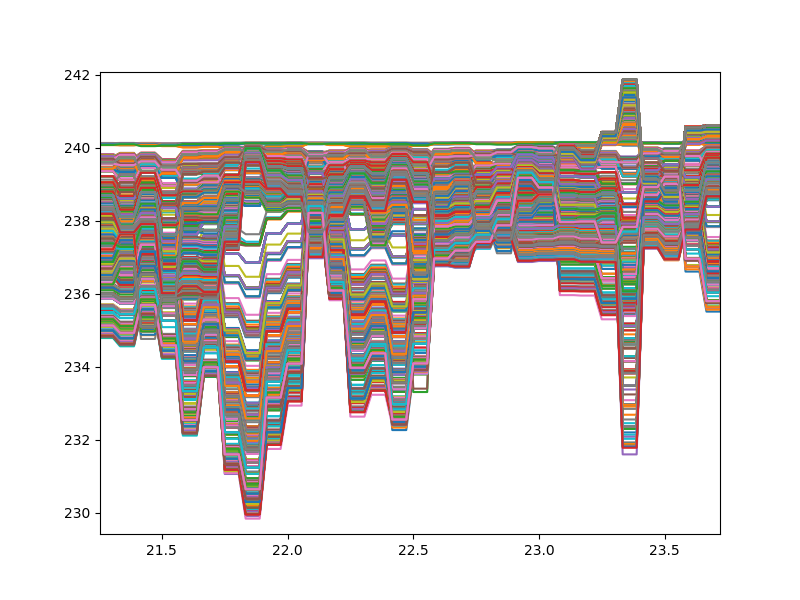

In [33]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111) #, projection='3d')
#a = ax.plot(np.abs(V_nodes[:,3:]))
a = ax.plot(T/3600,np.abs(V_nodes[:,3:]))
fig.savefig('out.png')
